# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

#Load Data

In [5]:
ticker = input("Enter the stock ticker symbol (e.g., TSLA, AAPL): ").upper()
msft=yf.Ticker(ticker)
df=msft.history(period='2y')

Enter the stock ticker symbol (e.g., TSLA, AAPL): tsla


# Quick Data Overview

In [6]:
print(df.head(4))
print("Max high Price",max(df["High"]))

                                 Open        High         Low       Close  \
Date                                                                        
2023-05-31 00:00:00-04:00  199.779999  203.949997  195.119995  203.929993   
2023-06-01 00:00:00-04:00  202.589996  209.800003  199.369995  207.520004   
2023-06-02 00:00:00-04:00  210.149994  217.250000  209.750000  213.970001   
2023-06-05 00:00:00-04:00  217.800003  221.289993  214.520004  217.610001   

                              Volume  Dividends  Stock Splits  
Date                                                           
2023-05-31 00:00:00-04:00  150711700        0.0           0.0  
2023-06-01 00:00:00-04:00  148029900        0.0           0.0  
2023-06-02 00:00:00-04:00  164129000        0.0           0.0  
2023-06-05 00:00:00-04:00  151143100        0.0           0.0  
488.5400085449219


# Data Visualization

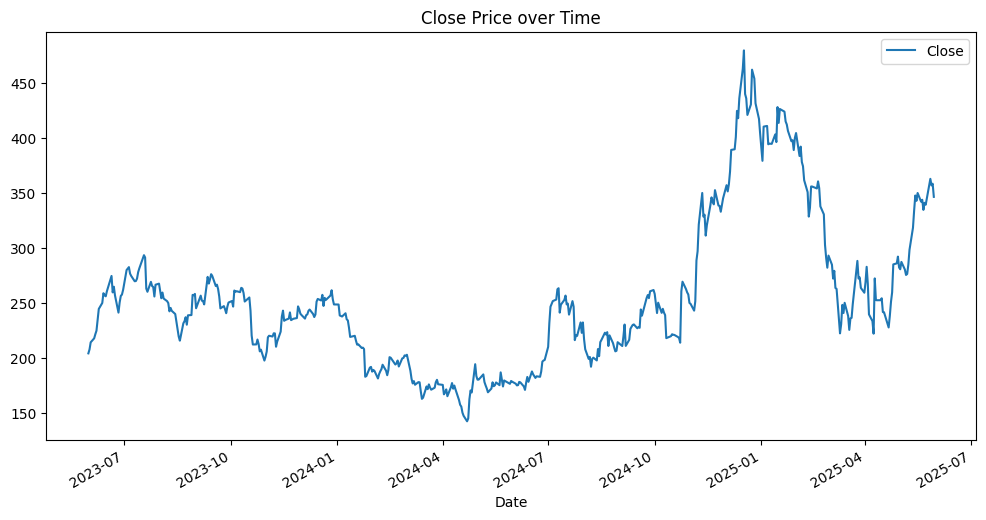

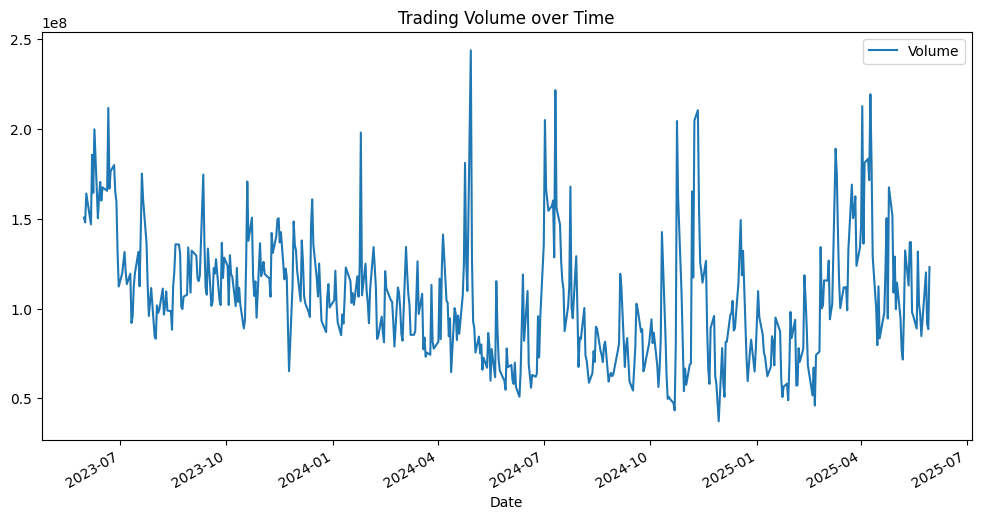

In [9]:
df.plot(y='Close', figsize=(12,6), title='Close Price over Time')
plt.show()

df.plot(y='Volume', figsize=(12,6), title='Trading Volume over Time')
plt.show()

# Feature Engineering

In [21]:
df["Lag1"]=df["Close"].shift(1)
df["Lag2"]=df["Close"].shift(2)
df["Lag5"]=df["Close"].shift(5)
df["SMA7"]=df["Close"].rolling(window=7).mean()
df["SMA10"]=df["Close"].rolling(window=10).mean()

# Dropping rows with missing values createdby shift and rolling

In [22]:
df.dropna(inplace=True)

# Prepare Dataset for Modeling

In [23]:
df['Target']=df['Close'].shift(-1)
df.dropna(inplace=True)
X=df[["Lag1","Lag2","Lag5","SMA7","SMA10"]]
Y=df["Target"]


# Split Data into Train and Test Sets

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(385, 5) (97, 5) (385,) (97,)


# Train Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

# Predict using Linear Regression

In [26]:
y_pred=lr.predict(x_test)


# Visualize SMA and Close Price for Recent Data

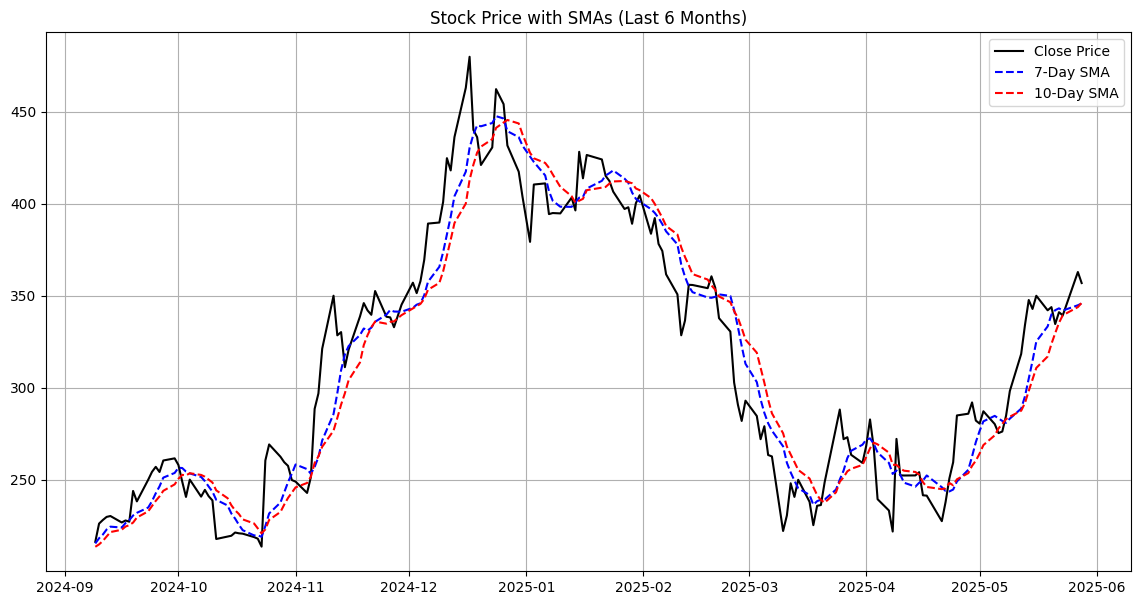

In [27]:
recent_data = df.iloc[-180:]

plt.figure(figsize=(14, 7))
plt.plot(recent_data.index, recent_data["Close"], label="Close Price", color="black")
plt.plot(recent_data.index, recent_data["SMA7"], label="7-Day SMA", color="blue", linestyle="--")
plt.plot(recent_data.index, recent_data["SMA10"], label="10-Day SMA", color="red", linestyle="--")
plt.title("Stock Price with SMAs (Last 6 Months)")
plt.legend()
plt.grid()
plt.show()

# Evaluate Linear Regression Model

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")

Linear Regression - MAE: 14.2839, RMSE: 17.7472, R2 Score: 0.9127


# Plot Actual vs Predicted (Linear Regression)

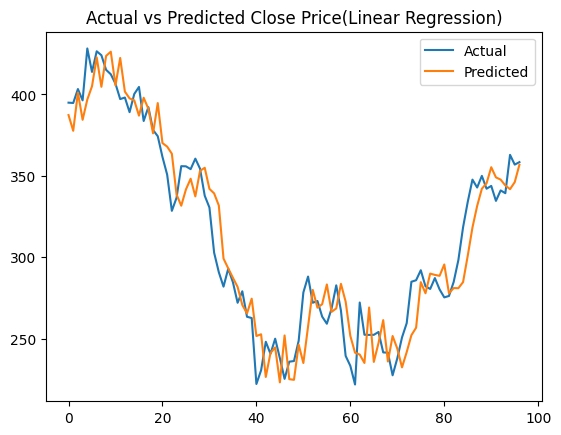

Intercept: 4.4901654548576175
Coefficients: [ 0.42002421 -0.6446722  -0.64329228  2.6239546  -0.7730003 ]


In [31]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Close Price(Linear Regression)")
plt.show()
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

# Train Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)


RandomForestRegressor()

# Predict using Random Forest

In [33]:
y_pred_rf = model.predict(x_test)

# Evaluate Random Forest Model

In [34]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R2 Score: {r2_rf:.4f}")


Random Forest - MAE: 21.0502, RMSE: 27.2531, R2 Score: 0.7941


# Feature Importances from Random Forest

In [37]:
print("Feature Importances:", model.feature_importances_)

Feature Importances: [0.73549741 0.10201581 0.01398113 0.11073647 0.03776917]


# Plot Actual vs Predicted (Random Forest)

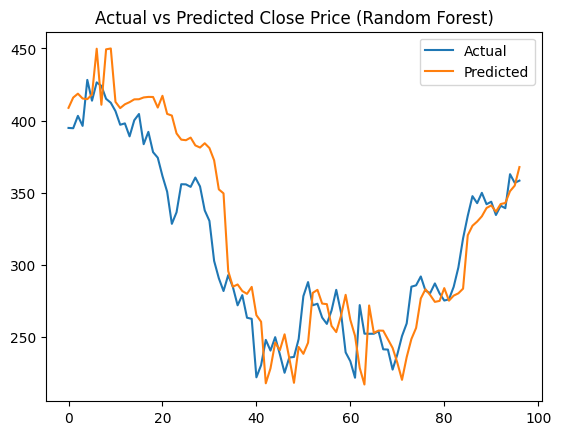

In [38]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Close Price (Random Forest)")
plt.show()